In [6]:
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as st
%matplotlib inline

### 1d KDE

In [7]:
num = 500
x = np.random.normal(0.4, 0.05, num)
x = np.append(x, np.random.normal(0.6, 0.005, num/10))

kernel = st.gaussian_kde(x)
positions = np.arange(0.0, 1.0, 0.001)
kernel = st.gaussian_kde(x)
z = kernel(positions)
z /= z.sum()  
print "Accumulated probability: %.2f" %z.sum()

Accumulated probability: 1.00


In [8]:
n = 1000
t = np.linspace(0, z.max(), n)
integral = ((z >= t[:, None]) * z).sum(axis=1)

from scipy import interpolate
f = interpolate.interp1d(integral, t)
t_contours = f(np.array([1.0, 0.95, 0.5, 0.25])).tolist()

(0.0, 0.01)

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


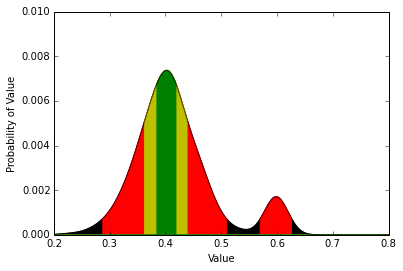

In [10]:
fig = plt.figure()
ax = fig.gca()
colors = ['k', 'r', 'y', 'g']
for i, val in enumerate(t_contours):
    mask = z < val
    y=z.copy()
    y[mask]=-10.
    ax.fill_between(positions, y, color=colors[i])
ax.plot(positions, z, color="k", alpha=0.60)
ax.set_xlabel('Value')
ax.set_ylabel('Probability of Value')
ax.set_xlim(0.2, 0.8)
ax.set_ylim(0.0, 0.01)

(0.0, 0.01)

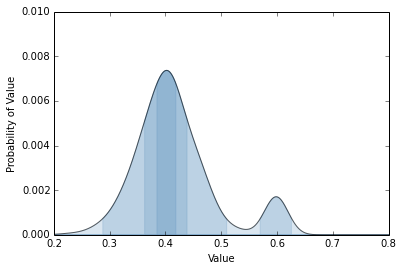

In [11]:
fig = plt.figure()
ax = fig.gca()
colors = ['k', 'r', 'y', 'g']
y=z.copy()
for i, val in enumerate(t_contours):
    mask = z < val
    y[mask]=-10.
    ax.fill_between(positions, y, color="steelblue", alpha=.2)
ax.plot(positions, z, color="k", alpha=0.60)
ax.set_xlabel('Value')
ax.set_ylabel('Probability of Value')
ax.set_xlim(0.2, 0.8)
ax.set_ylim(0.0, 0.01)

### 2d KDE

In [12]:
num = 100
x = np.random.normal(0.4, 0.05, num)
x = np.append(x, np.random.normal(0.6, 0.03, num/10))

y = np.random.normal(0.4, 0.05, num)
y = np.append(y, np.random.normal(0.6, 0.03, num/10))

xmin, xmax = 0.2, 0.8
ymin, ymax = 0.2, 0.8

(0.2, 0.8)

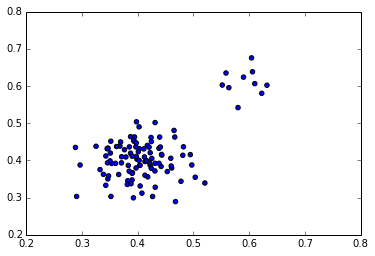

In [13]:
fig = plt.figure()
ax = fig.gca()
ax.scatter(x,y)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

In [22]:
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
z = kernel(positions)
z = z/z.sum()
print "Accumulated probability: %.2f" %z.sum()
z = np.reshape(z, xx.shape)

Accumulated probability: 1.00


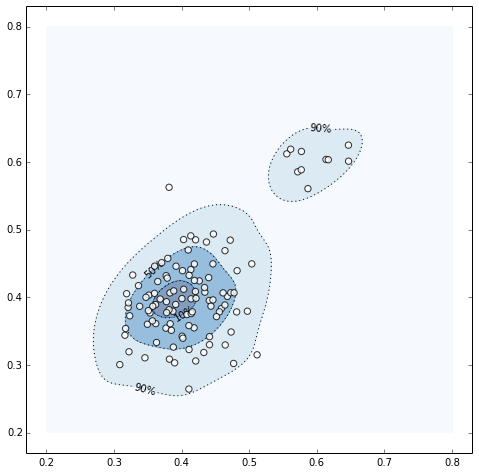

In [24]:
n = 1000
t = np.linspace(0, z.max(), n)
integral = ((z >= t[:, None, None]) * z).sum(axis=(1,2))

from scipy import interpolate
f = interpolate.interp1d(integral, t)
t_contours = f(np.array([0.9, 0.5, 0.1])).tolist()

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.scatter(x,y, facecolor='w', color='k', alpha=0.8, s=40, zorder=100)
ax.contourf(xx, yy, z, cmap='Blues', levels=[0.0]+t_contours+[z.max()], alpha=0.5)
cset = ax.contour(xx, yy, z, levels=t_contours, colors='k', linestyles='dotted')
ax.clabel(cset, inline=1, fontsize=10, fmt=dict(zip(t_contours, ['90%', '50%', '10%'])))
plt.show()